⚠️ This project is mandatory for certification bloc #2.

![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating with Tinder

## Description de la société 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> est une **application de rencontres en ligne et de réseautage géosocial**.
Sur Tinder, les utilisateurs **“swipent à droite”** pour indiquer qu’ils aiment un profil, ou **“swipent à gauche”** pour passer — chaque profil comprenant **des photos, une courte biographie et une liste d’intérêts**.

L’application a été **lancée en 2012** par **Sean Rad**, lors d’un **hackathon organisé au sein de l’incubateur Hatch Labs**, à **West Hollywood (Californie)**.

# Étude Speed Dating — Analyse exploratoire et modélisation

Ce notebook présente une analyse académique du jeu de données *Speed Dating*, avec une démarche structurée : contexte, objectifs, préparation des données, EDA, modélisation et discussion des limites.

## Projet 🚧

L’équipe marketing a besoin d’aide pour un nouveau projet.
Elle observe une **diminution du nombre de matchs** et cherche à comprendre **ce qui favorise l’attirance mutuelle entre deux individus**.

Pour ce faire, Tinder a organisé une **expérience de speed dating** : les participants ont dû fournir à l’entreprise de **nombreuses informations personnelles**, susceptibles de **refléter leur futur profil sur l’application**.

Tinder a ensuite **collecté les données issues de cette expérience**.
Chaque ligne du jeu de données correspond à **un rendez-vous entre deux personnes** et indique si chacune d’elles a **secrètement exprimé le souhait de revoir l’autre** pour un second rendez-vous.


## Projet — Contexte et objectifs 🚧

**Objectif général :** identifier les déterminants d'une seconde rencontre.

**Objectifs spécifiques :**
- documenter la structure des données (variables, valeurs manquantes, distributions) ;
- explorer les corrélations et éventuelles non‑linéarités ;
- proposer une première base de modèles prédictifs et d'interprétabilité (coefficients, importances).

## Objectifs 🎯

Utiliser le jeu de données pour **comprendre ce qui suscite l’intérêt mutuel entre deux personnes** et les conduit à **accepter un second rendez-vous** :

* Vous pouvez utiliser des **statistiques descriptives** ;
* Vous pouvez également vous appuyer sur des **visualisations** pour appuyer votre analyse.


## Périmètre du Projet 🖼️

Les données ont été collectées auprès de participants à des **événements expérimentaux de speed dating** organisés entre **2002 et 2004**.
Lors de ces sessions, chaque participant avait un **rendez-vous de quatre minutes** avec chaque personne du sexe opposé.
À la fin de ces quatre minutes, les participants indiquaient s’ils **souhaitaient revoir leur partenaire**.
Ils devaient également **évaluer leur rendez-vous** selon **six critères** :

* **Attractivité**,
* **Sincérité**,
* **Intelligence**,
* **Sens de l’humour / Amusement**,
* **Ambition**,
* **Centres d’intérêt communs**.

Le jeu de données comprend également des **questionnaires complémentaires**, remplis à différents moments du processus.
Ces champs couvrent notamment :

* les **données démographiques**,
* les **habitudes de rencontre**,
* la **perception de soi** sur certains traits,
* les **croyances sur ce que les autres recherchent** chez un partenaire,
* et des informations sur le **style de vie**.

Pour plus de détails, se référer au document **Speed Dating Data Key**.


[Dataset](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv)

[Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc)

## Conseils 🦮

Pour vous aider à réussir ce projet, voici quelques **pistes d’exploration des données** :

Idées d’analyse exploratoire :

* Quels sont les **traits les moins recherchés** chez un partenaire masculin ? Et ces critères diffèrent-ils pour les partenaires féminins ?
* Quelle est la **place réelle de l’apparence physique** dans le choix d’un partenaire, comparée à l’importance que les gens **pensent** lui accorder ?
* Les **centres d’intérêt communs** sont-ils plus importants qu’un **arrière-plan culturel ou ethnique partagé** ?
* Les individus peuvent-ils **évaluer avec précision la valeur** qu’ils projettent sur le marché des rencontres ?
* Pour obtenir un **second rendez-vous**, vaut-il mieux être le **premier** ou le **dernier rendez-vous** de la soirée ?


## Livrable 📬

Pour finaliser ce projet, votre équipe doit fournir :

Un **notebook** contenant :

* des **statistiques descriptives** ;
* des **visualisations** ;
* des **légendes et interprétations** expliquant en quoi ces statistiques et visualisations éclairent les **raisons pour lesquelles les personnes acceptent un second rendez-vous**.


# Rendu
## Étude Speed Dating — Analyse exploratoire et modélisation

Ce notebook présente une analyse académique du jeu de données *Speed Dating*, avec une démarche structurée : contexte, objectifs, préparation des données, EDA, modélisation et discussion des limites.


## Imports

In [30]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from plotly.subplots import make_subplots

## Chargement des données

Chargement du fichier source et contrôle basique de l'intégrité : dimensions, schéma, aperçus tabulaires. 
Le fichier a un problème d'encodage. Il est nécessaire de l'importer en utilisant l'encodage ISO-8859-1.

In [67]:
pd.options.display.max_rows = 1000 # le fichier est long
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
speed_dating = pd.read_csv('./Data/Speed+Dating+Data.csv', encoding="ISO-8859-1") 

## Exploration des données

Aperçu des premières lignes et des informations générales (`info()`, `describe()`), y compris le taux de valeurs manquantes par variable.

In [68]:
display(speed_dating.describe())
display(speed_dating.head())
display(speed_dating.isnull().sum())
speed_dating.isnull().sum().sum()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

np.int64(432016)

Le fichier contient réellement beaucoup de données manquantes. Le graphe ci-dessous montre la mauvaise qualité des données.

<Axes: title={'center': 'Données manquantes en %'}, ylabel='Taux de données manquantes par variable'>

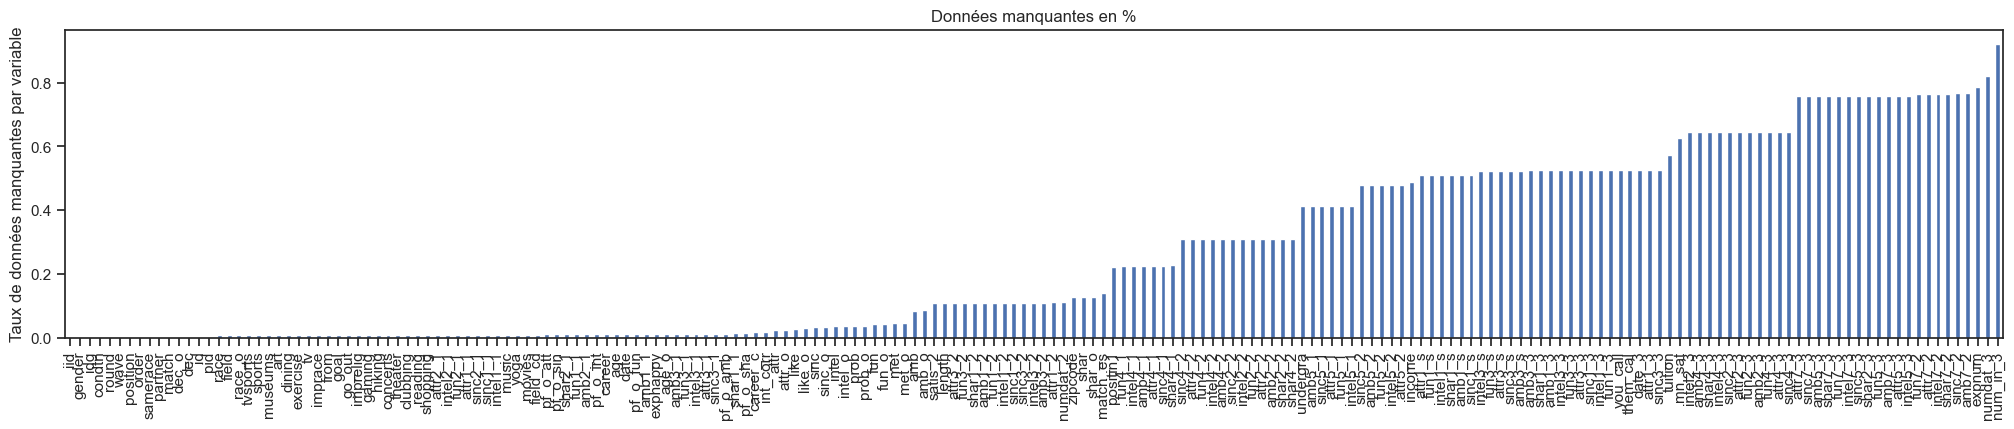

In [34]:
# Large amount of data missing on some characteristics, most because of dependency on other data, some without context.
speed_dating.isna().mean().sort_values().plot(kind="bar", figsize=(25, 4),
            title="Données manquantes en %", ylabel="Taux de données manquantes par variable")


Nous sommes plus en présence d'un dataswamp plutôt qu'un datalake.


## Exploration des données

On commence par analyser la répartition entre les hommes et les femmes.

In [ ]:

speed_dating['genre_nom'] = speed_dating['gender'].apply(lambda x: 'Femme' if x==0 else 'Homme')              
fig = px.histogram(speed_dating, x= 'genre', 
                   color= 'genre',
                   barmode="group",
                   title="Répartition Homme Femme" )
fig.update_layout(legend_title_text='Genre')


<a name="genre">Genre : </a>La répartition est équilibrée entre les genres (4184 Femme et 4194 homme). Passons maintenant à l'anlyse de la répartition des âges de la population.

In [69]:
# age vs gender
fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Histogram(x= speed_dating[speed_dating['gender'] == 0].age, name= 'Femme', nbinsx=74 ), row=1, col=1)
fig.add_trace(go.Histogram(x= speed_dating[speed_dating['gender'] == 1].age, name= 'Homme' , nbinsx=74), row=1, col=1)
fig.add_trace(go.Box(y= speed_dating[speed_dating['gender'] == 0].age, x= [0] * speed_dating[speed_dating['gender'] == 0].shape[0], name= 'Boîte Femme'),row=1, col=2)
fig.add_trace(go.Box(y= speed_dating[speed_dating['gender'] == 1].age, x= [1] * speed_dating[speed_dating['gender'] == 1].shape[0], name= 'Boîte Homme'),row=1, col=2)
fig.add_trace(go.Histogram(x= speed_dating["gender"], bingroup="group" ),row=2, col=1)
fig.update_layout(height=600, width=1100, barmode='stack', title_text="Répartion des âges chez les hommes et les femmes")
fig.show()

Les hommes sont un peu plus âgés que les femmes mais la population global est jeune avec une moyenne d'age de . Il s'agit de considération faite malgrès l'absence de nombreuses deonnées d'ages (104 valeurs). Il est interessant de constater qu'en comparant le graphique de la répartition d'âge en fonction du genre avec [celui](#genre) équilibré des répartitions de genre de la population plus de femmes que d'hommes n'ont pas donné leur âge !

In [37]:
# gender vs feild (field of study)

speed_dating['field'] = speed_dating['field'].str.lower()

fig = go.Figure()
for field in speed_dating['field'].value_counts().index:
    fig.add_trace(go.Histogram(y= speed_dating[speed_dating['field'] == field].field, name= f'{field}'))
    
fig = fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(height=1800, width=1200, title_text="Distribution of field of study for all of the participants")
fig.show()

In [38]:
fig = make_subplots(cols=3, rows= 3, specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}]])
for i, field in enumerate(speed_dating['field'].value_counts().index[0:9]):
    fig.add_trace(
        go.Pie(labels=speed_dating[speed_dating['field'] == field].gender_str, title= field.upper(), name= field.upper(), hole=.5), 
        row= int(i/3) + 1, col= int(i%3) + 1)

fig.update_layout(height= 1000, width= 1000, title='Gender distribution over fields of study', legend_title_text='Gender')
fig.show()

In [39]:
# so, what is match percent???
fig = go.Figure(data=[
    go.Pie(values= speed_dating['match'].value_counts(), 
           labels= ['No', 'Yes'],
           pull=[0, 0.20], 
           marker_colors= ['#FF4040', '#7AB02C'])
])

fig.update_layout(height = 600, width= 600,legend_title_text='Match', title=f"Count of matches/no-matches")

In [40]:
fig = px.histogram(x= speed_dating['position'], barmode= 'group', color= speed_dating['match'], labels= speed_dating['position'])
fig.update_xaxes(type='category', title_text= 'Position')
fig.update_layout(height = 700, width= 700,legend_title_text='Match', title=f"Count of matches/no-matches by positions they met")

In [41]:

fig = px.histogram(x=speed_dating['int_corr'], barmode= 'group', color= speed_dating['match']) 
fig.update_xaxes(title_text= 'Interest correlation')
fig.update_layout(height = 600, width= 1000,legend_title_text='Match', title=f"Count of matches/no-matches by their interests correlation")

In [42]:
# convert to numeric
n_income = []
speed_dating['income'].fillna(-1, inplace= True)
for val in speed_dating['income'].values:
    if val == -1:
        n_income.append(-1)
    else:
        n_income.append(int(val[:val.find('.')].replace(',','')))
speed_dating['income'] = n_income

/var/folders/6m/4bfx39_j0519_3g3r0sp6fbw0000gn/T/ipykernel_51211/2607676611.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
fig = go.Figure(go.Histogram(x= speed_dating[(speed_dating.match == 1) & (speed_dating.income != -1)].income, nbinsx= 100))
fig.update_layout(height = 600, width= 1000, title=f"Person's income in matches")
fig.show()

In [44]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=speed_dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [45]:
# narrowing dataset
dating_1 = speed_dating.iloc[:, 11:28]
dating_2 = speed_dating.iloc[:, 30:35]
dating_3 = speed_dating.iloc[:, 39:43]
dating_4 = speed_dating.iloc[:, 45:67]
dating_5 = speed_dating.iloc[:, 69:74]
dating_6 = speed_dating.iloc[:, 87:91]
dating_7 = speed_dating.iloc[:, 97:102]
dating_8 = speed_dating.iloc[:, 104:107]

date = pd.concat([speed_dating.iloc[:, 0],speed_dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [46]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [47]:
# removing null rows now that the nulls are in the hundreds and not the thousands
date2 = date.dropna()

In [48]:
# checking datatypes
date2.dtypes

iid           int64
gender        int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
race        float64
imprace     float64
imprelig    float64
from         object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64
shopping    float64
yoga        float64


In [49]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

In [50]:
# heatmap
corr = date3.corr()
fig = px.imshow(corr,title="Correlation Heatmap")
fig.show()
# saving cleaned dataset
date2.to_csv('./Data/speed_dating_cleaned.csv', index=False)

In looking at the <a id="hm">heatmap</a> above, there are some interesting observations.

For example, men (gender = 1) seem to have a preference for attractive partners (attr1_1) while women (gender = 0) seem to have a preference for ambitious partners (amb1_1)!

In other news, women like shopping and yoga and men like gaming, so at least we know this heatmap is working. Let's look into the <a id="hm">interests</a> some more!

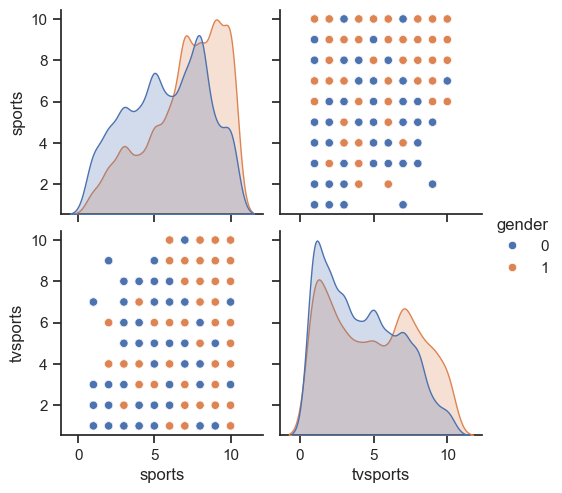

In [51]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

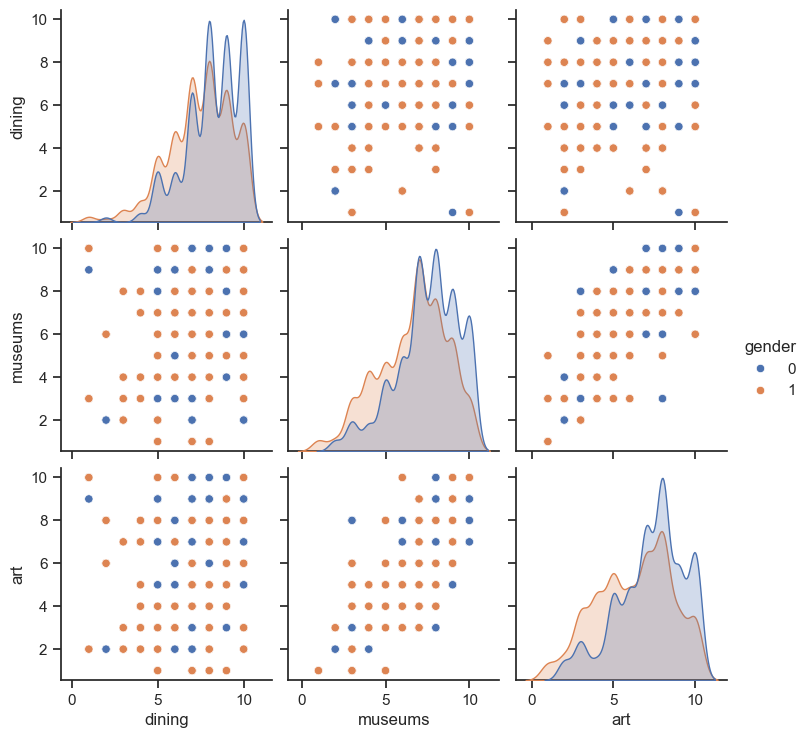

In [52]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

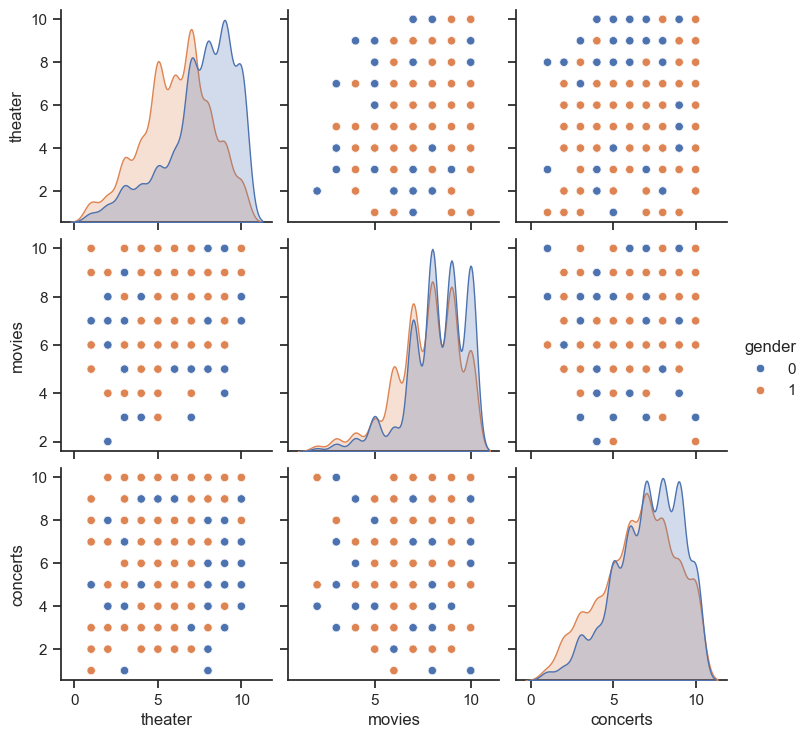

In [53]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender")

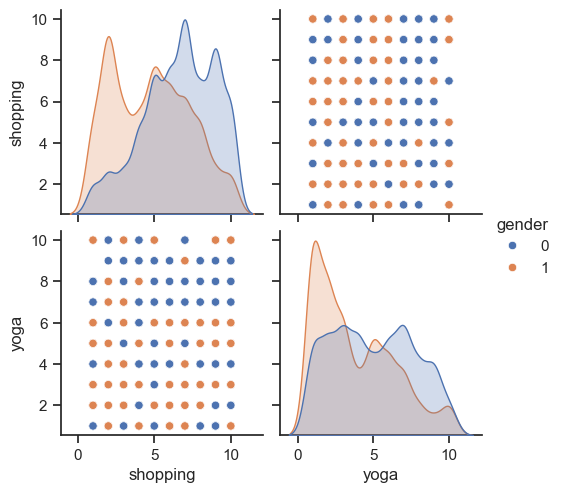

In [54]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

Just for fun, I wanted to see how interests differed by gender. The histograms above show that **if you want to suggest a date that both genders are likely to enjoy, choose movies or dining!**

However, referring back to the heatmap none of the interests really correlated with match, so that gives me the go-ahead to remove interests from my match prediction model!

It also looks like match (the variable we are interested in) is mostly correlated to the decisions of the partners, and the partner's attributes (how well they rated the partner's attractiveness, sincerity, intelligence, fun, ambition, and how much they liked them).

Interestingly, match was not correlated to age or race, or even how similar the participant and partner's interests are (int_corr)! Love does not discriminate according to the data!

In [55]:
# removing interests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [57]:
date4

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
30,4,0,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,...,9.0,7.0,0,4.0,10.0,8.0,5.0,6.0,7.0,2.0
31,4,0,12.0,0,-0.18,1,22.0,2.0,60.0,0.0,...,9.0,7.0,0,8.0,7.0,8.0,10.0,8.0,1.0,1.0
33,4,0,14.0,1,-0.18,1,23.0,2.0,30.0,5.0,...,9.0,7.0,1,8.0,10.0,7.0,10.0,8.0,10.0,1.0
34,4,0,15.0,0,0.21,0,24.0,3.0,30.0,10.0,...,9.0,7.0,0,6.0,9.0,8.0,9.0,7.0,7.0,2.0
35,4,0,16.0,0,0.37,1,25.0,2.0,50.0,0.0,...,9.0,7.0,0,5.0,10.0,8.0,4.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,552,1,524.0,1,0.59,0,25.0,4.0,15.0,20.0,...,6.0,7.0,1,8.0,7.0,8.0,8.0,7.0,6.0,0.0
8372,552,1,525.0,0,0.28,1,24.0,2.0,10.0,15.0,...,6.0,7.0,0,7.0,5.0,5.0,5.0,4.0,4.0,0.0
8374,552,1,527.0,0,0.71,0,24.0,6.0,50.0,20.0,...,6.0,7.0,0,4.0,6.0,8.0,4.0,4.0,4.0,0.0
8376,552,1,529.0,0,0.62,0,22.0,4.0,10.0,25.0,...,6.0,7.0,0,4.0,6.0,5.0,4.0,5.0,5.0,0.0


On examine si le genre de la personne influence les réponses de demande.

In [58]:
# looking at dec_o by gender
px.histogram(date4['"dec_o"'])


KeyError: '"dec_o"'

In [ ]:
# chi-square test
gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_rslt = gender_table.test_nominal_association()
gender_rslt.pvalue

np.float64(1.1102230246251565e-16)

It looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". Men received about 2050 'no' and about 1300 'yes'. In other words, **men are more likely to be rejected by women than women are to be rejected by men** (wahwah). This is a statistically significant difference as confirmed by the above chi-squared test p-value. Poor guys!

Now, I wonder, how many interactions were <a id="url">unrequited love</a>? That is, getting the count of rows where dec_o = 1 AND dec = 0 OR a dec = 1 AND dec_o = 0?

In [ ]:
# unrequited love count
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

So it seems **26% of participants unfortunately had their heart broken**. More than the percentage of people who got a second date! 

On an unrelated note, I wonder if the incidence of unrequited love differs by the attractiveness of the partner.

In [ ]:
# encoding unrequited love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

In [ ]:
# looking at url by attractiveness

px.box(date4,x='url', y='attr',title='Broken Hearts by Attractiveness of Partner', labels={'url':'Broken Heart', 'attr':'Attractiveness of Partner'})


In [ ]:
# chi-square test
bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.url)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

np.float64(0.5300021303134914)

Looks like the difference in attractiveness was not statistically significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

In [ ]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['url']],axis=1)


corr = date5.corr()
fig = px.imshow(corr,title="Correlation Heatmap")
fig.show()


It looks like regardless of your attractiveness, or any other trait for that matter, you are just as likely to experience heartbreak!

It also looks like typically, your own opinion of how attractive you are (attr3_1) is only weakly correlated with how attractive your date finds you (attr_o)! And in fact, there is nearly no correlation between how smart or sincere you think you are versus how smart and sincere your date thinks of you! Perhaps these are tough qualities to get across in a 4 minute date!

So that brings up the question, between attractiveness, sincerity, intelligence, fun, ambition, and liking, what was the most influential in the final decision (dec)? I'll run a <a id="ols">linear regression model</a>.

In [ ]:
# OLS model with coefficients
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dec   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              1712.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:25:07   Log-Likelihood:                         -3686.4
No. Observations:                6797   AIC:                                      7385.
Df Residuals:                    6791   BIC:                                      7426.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0555      0.004     15.678      0.000       0.049       0.062
sinc          -0.0351      0.004     -8.750      0.000      -0.043      -0.027
intel         -0.0485      0.004    -11.897      0.000      -0.057      -0.041
fun            0.0173      0.004      4.495      0.000       0.010       0.025
like           0.0997      0.004     22.261      0.000       0.091       0.109
int_corr      -0.0366      0.017     -2.210      0.027      -0.069      -0.004
==============================================================================
Omnibus:                     4603.362   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.555
Skew:                           0.072   Prob(JB):                     2.11e-86
Kurtosis:                       1.828   Cond. No.                         50.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It turns out that being intelligent or sincere or having similar interests actually slightly hurts your chances at securing that second date! Don't panic though, this is just from 4 minutes of meeting each other! We might take this as advice to focus on breaking the ice and being more fun and likeable in the first date!

Now let's run an OLS but with both respondents' ratings instead of just one, and this time on match instead of decision (dec).

In [ ]:
# OLS model with coefficients
X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  match   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              1381.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):                        0.00
Time:                        00:25:38   Log-Likelihood:                         -180.33
No. Observations:                6797   AIC:                                      378.7
Df Residuals:                    6788   BIC:                                      440.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4463      0.007     62.145      0.000       0.432       0.460
dec_o          0.4463      0.007     62.417      0.000       0.432       0.460
attr          -0.0013      0.002     -0.584      0.559      -0.005       0.003
attr_o        -0.0009      0.002     -0.406      0.685      -0.005       0.003
fun            0.0006      0.002      0.249      0.803      -0.004       0.005
fun_o          0.0012      0.002      0.555      0.579      -0.003       0.006
like          -0.0161      0.003     -6.132      0.000      -0.021      -0.011
like_o        -0.0170      0.003     -6.523      0.000      -0.022      -0.012
int_corr       0.0036      0.010      0.364      0.716      -0.016       0.023
==============================================================================
Omnibus:                    33151.792   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.640
Skew:                           0.256   Prob(JB):                    1.27e-177
Kurtosis:                       1.383   Cond. No.                         51.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# ml models (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# preparing the data
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8282140886518301
Validation Accuracy: 0.8279411764705882


Without knowing what the partner's decision is (dec_o), it turns out that given how much the respondent likes the partner and what the respondent's decision is, we have about an 82.5% accuracy in predicting a match on both the training and the validation using <a id="rf">logistic regression</a>. This makes sense given that we know only 26% of people were heartbroken -- if you like someone, odds are they will like you back!

Let's try some other models to see if we can get closer to predicting a match.

In [ ]:
# train/test split
train_df = speed_dating.drop(columns= ['match'])
train_df = train_df._get_numeric_data().bfill()
train_df = train_df.fillna(22)
print(train_df.head(3))
train_df.shape, speed_dating['match'].shape

   iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       2.0      4  ...   
1    1  1.0       0    1       1     1     10         7       2.0      3  ...   
2    1  1.0       0    1       1     1     10         7       2.0     10  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      9.0     10.0      10.0   
1      5.0      7.0       7.0     7.0     7.0      9.0     10.0      10.0   
2      5.0      7.0       7.0     7.0     7.0      9.0     10.0      10.0   

   fun5_3  amb5_3  
0     7.0    10.0  
1     7.0    10.0  
2     7.0    10.0  

[3 rows x 187 columns]


((8378, 187), (8378,))

In [ ]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8289497884862976
Validation Accuracy: 0.8279411764705882


In [ ]:
param_grid = {
    "n_estimators":[100,150,200,250,300],
    "max_depth":[10,30,50,100,130],
    "max_features":[x for x in range(10, int(len(train_df.columns)/2), 20)]
}

In [ ]:
g_searcher_r_forest = GridSearchCV(model, param_grid, n_jobs= -1)
fit_results = g_searcher_r_forest.fit(X_train, y_train)

In [ ]:
pd.DataFrame(fit_results.cv_results_).head(10)

In [ ]:
features = train_df.columns
importances = fit_results.best_estimator_.feature_importances_
indices = np.argsort(importances)
indices = indices[-15:]


# plot feature importances

px.bar(range(len(indices)), importances[indices], color='b',title='Feature Importances')


NameError: name 'train_df' is not defined

## <a id="ccn"> Conclusion </a>

Although this was slightly disappointing, it looks like there still is no real answers to the secret of love. It's not interests or hobbies, it's not attractiveness or intelligence or other traits. Really it's just how much someone likes you. Who would have thought?

On the other hand, we did learn a thing or two. To summarize:
 * Take your date out to the cliche dinner and a movie because both genders are likely to enjoy it
 * Dating is tougher for men (perhaps women can be more selective?)
 * More participants experienced unrequited love than those that found love -- so don't feel too bad
 * People get their heartbroken regardless of their personal traits like attractiveness, so if you strike out, it's not you that is the problem
 * Your impression of yourself is often wrong
 * There is no one trait that makes you likeable
 * Being likeable is important for securing that second date!